In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import fmin
import math
N = norm.cdf

In [ ]:
N = norm.cdf
S0=9.520000
T=0.841000
K=10.750000
r=0
q=0
sigma=0.288400
d1 = (math.log(K/S0) + T*(q-r+sigma**2/2))/(sigma*np.sqrt(T))
print(np.sqrt(2)*S0**2*np.exp(r*T-2*q*T-T*sigma**2)*N(d1/np.sqrt(2) - np.sqrt(2)*sigma) - K*np.exp(-(q+0.5*sigma**2))*N(d1))

52.801920513264434


In [ ]:
def Black_Scholes_S(S0, r, q, T, sigma, W):
  return S0*np.exp((r-q-0.5*sigma**(2))*T + sigma*W)

Compute the price at t=0 of a Call option, in the Black-Scholes model, with the parameters S_0=90.600000, T=0.579000, K=94.660000, r=0.012000, q=0.028000, \sigma=0.149100 (expected accuracy = 0.001).

In [ ]:
N = norm.cdf

def BS_CALLDIV(S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return S*np.exp(-q*T) * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUTDIV(S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*np.exp(-q*T)*N(-d1)

S_0=90.600000
T=0.579000
K=94.660000
r=0.012000
q=0.028000
sigma=0.149100
print('Call:',BS_CALLDIV(S, K, T, r, q, sigma))
print('Put:',BS_PUTDIV(S, K, T, r, q, sigma))

Call: 0.0
Put: 93.03050235912036


Compute the price at t=0 of a Power Call option with payoff  (S_T^n-K)_+ , in the Black-Scholes model, with the parameters n=3, S_0=0.940000, T=0.226000, K=1.080000, r=0.096000, q=0.022000, \sigma=0.153300 (expected accuracy = 0.0001).

In [ ]:
n=3
S=0.940000
T=0.226000
K=1.080000
r=0.096000
q=0.022000
sigma=0.153300

alpha = r - q
mu = n*alpha + 0.5*n*(n-1)*sigma**2
gamma = n*sigma

def BS_CALLPOW(S, K, T, r, mu, gamma):
    d1 = (np.log(S**n/K) + (mu + gamma**2/2)*T) / (gamma*np.sqrt(T))
    d2 = d1 - gamma* np.sqrt(T)
    return np.exp(-r*T)*(S**n*np.exp(mu*T)*N(d1) - K*N(d2))

def BS_PUTPOW(S, K, T, r, mu, gamma):
    d1 = (np.log(S**n/K) + (mu + gamma**2/2)*T) / (gamma*np.sqrt(T))
    d2 = d1 - gamma* np.sqrt(T)
    return np.exp(-r*T)*(K*N(-d2) - S**n*np.exp(mu*T)*N(-d1))

print('Call:',BS_CALLPOW(S, K, T, r, mu, gamma))
print('Put:',BS_PUTPOW(S, K, T, r, mu, gamma))

Call: 0.02100794197039858
Put: 0.20952740991490673


In [ ]:
n=2
S=0.980000
T=0.487000
K=0.950000
r=0.080000
q=0.015000
sigma=0.125300

alpha = r - q
mu = n*alpha + 0.5*n*(n-1)*sigma**2
gamma = n*sigma

def BS_CALLPOW(S, K, T, r, mu, gamma):
    d1 = (np.log(S**n/K) + (mu + gamma**2/2)*T) / (gamma*np.sqrt(T))
    d2 = d1 - gamma* np.sqrt(T)
    return np.exp(-r*T)*(S**n*np.exp(mu*T)*N(d1) - K*N(d2))

def BS_PUTPOW(S, K, T, r, mu, gamma):
    d1 = (np.log(S**n/K) + (mu + gamma**2/2)*T) / (gamma*np.sqrt(T))
    d2 = d1 - gamma* np.sqrt(T)
    return np.exp(-r*T)*(K*N(-d2) - S**n*np.exp(mu*T)*N(-d1))

print('Call:',BS_CALLPOW(S, K, T, r, mu, gamma))
print('Put:',BS_PUTPOW(S, K, T, r, mu, gamma))

Call: 0.11246004566926728
Put: 0.03453397673210547


In [ ]:
import math
from scipy.stats import norm

def digital_call_option_price(S0, K, T, r, sigma):
    d1 = (math.log(S0 / K) + (r + (sigma ** 2) / 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    # Calculate the price of the digital call option
    price = math.exp(-r * T) * norm.cdf(d2)

    return price

# Input parameters
S0 = 94.38
K = 91.67
T = 0.988
r = 0.037
sigma = 0.2118

# Calculate the price of the digital call option
digital_call_price = digital_call_option_price(S0, K, T, r, sigma)

print(f"The price of the Digital Call option is approximately {digital_call_price:.4f}")


The price of the Digital Call option is approximately 0.5610


In [ ]:
import math

def power_call_option_price(n, S0, K, T, r, q, sigma):
    # Calculate the necessary parameters
    d1 = (math.log(S0 / K) + (r - q + (n - 1) * (sigma ** 2) / 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    # Calculate the price of the power call option
    price = math.exp(-r * T) * (S0 ** n * math.exp((r - q) * T) * norm.cdf(d1) - K ** n * norm.cdf(d2))

    return price

# Input parameters
n = 2
S0 = 0.98
K = 0.95
T = 0.487
r = 0.08
q = 0.015
sigma = 0.1253

# Import the norm function from scipy.stats
from scipy.stats import norm

# Calculate the price of the Power Call option
power_call_price = power_call_option_price(n, S0, K, T, r, q, sigma)

print(f"The price of the Power Call option is approximately {power_call_price:.4f}")


The price of the Power Call option is approximately 0.0897


Consider a Call option with parameters T=0.401000, K=93.090000 written on an asset with parameters S_0=92.970000, r=0.052000, q=0.093000. The Market Call price at t=0 is 2.860845, what is its (Black-Scholes) implied volatility ? (expected accuracy = 0.0001)

In [ ]:
from py_vollib.black_scholes_merton.implied_volatility import implied_volatility

T=0.401
K=93.09
S=92.97
r=0.052
q= 0.093
cm=2.860845

flag = 'c'

iv = implied_volatility(cm, S, K, T, r, q, flag)
print(iv)

0.15800001150955043


In [ ]:
# T=0.401
# K=93.09
# S=92.97
# r=0.052
# q= 0.093
# cm=2.860845

# def ImpliedVolatilityCall(s):
#     d1 = (np.log(S/K)+(r-q+0.5*s[0]**2)*T) / (s[0]*np.sqrt(T))
#     d2 = (np.log(S/K)+(r-q-0.5*s[0]**2)*T) / (s[0]*np.sqrt(T))
#     of = S*np.exp(-q*(T))*N(d1) - K*np.exp(-r*T)*N(d2)
#     val = of**2
#     print("[σ]=",s,", Object Function Value:", val)
#     return(val)

# s = fmin(ImpliedVolatilityCall, [np.sqrt(np.abs(np.log(S*np.exp(r*T)/K))*2/T)])

[σ]= [0.31235645] , Object Function Value: 40.280483578061975
[σ]= [0.32797427] , Object Function Value: 44.89055527289935
[σ]= [0.29673863] , Object Function Value: 35.919759893277664
[σ]= [0.2811208] , Object Function Value: 31.808813894098684
[σ]= [0.24988516] , Object Function Value: 24.337808604793054
[σ]= [0.21864951] , Object Function Value: 17.870200603316675
[σ]= [0.15617822] , Object Function Value: 7.952186823870649
[σ]= [0.09370693] , Object Function Value: 2.052312860622379
[σ]= [-0.03123564] , Object Function Value: 3.1789084257103073
[σ]= [0.03123564] , Object Function Value: 0.03264791729028001
[σ]= [-0.03123564] , Object Function Value: 3.1789084257103073
[σ]= [0.06247129] , Object Function Value: 0.5865010612641124
[σ]= [2.22044605e-16] , Object Function Value: 0.0
[σ]= [-0.03123564] , Object Function Value: 3.1789084257103073
[σ]= [-0.03123564] , Object Function Value: 3.1789084257103073
[σ]= [0.01561782] , Object Function Value: 0.0001687419630698005
[σ]= [-0.015617

In [ ]:
S=96.720000
T=2.913000
K=99.330000
r=0.053000
q=0.000000
np.sqrt(np.abs(np.log(S*np.exp(r*T)/K))*2/T)

0.2961725938385806

We consider a discrete time model with n=14 periods. At each period, the asset can increase by x% with probability p and decrease by y% with probability 1-p.
The asset does not pay dividend and the interest rate is r (using the notation from the lectures).
Compute the price at t=0 of the European Call option in this discrete time model, with the parameters S_0=9.95, K=100.36, r=0.000, p=0.75, x=11.87, y=10.61 (expected accuracy = 0.001).

In [ ]:
S=9.95
K=100.36
r=0.000
p=0.75
x=11.87
y=10.61

u = x/100
d = -y/100

R = 1+r
U = 1+u
D = 1+d
ro = (R-D)/(U-D)

c0 = sum([math.comb(n,k)*ro**(k)*(1-ro)**(n-k) * max(S*U**(k)*D**(n-k) - K, 0) for k in range(n+1)]) / R**n
c0

0.0

We consider a discrete time model with n=14 periods. At each period, the asset can increase by x% with probability p and decrease by y% with probability 1-p.
The asset does not pay dividend and the interest rate is r (using the notation from the lectures).
Compute the price at t=0 of the European Put option in this discrete time model, with the parameters S_0=10.05, K=100.73, r=0.003, p=0.62, x=12.00, y=10.71 (expected accuracy = 0.001).

In [ ]:
S=10.05
K=100.73
r=0.003
p=0.62
x=12.00
y=10.71

u = x/100
d = -y/100

R = 1+r
U = 1+u
D = 1+d
ro = (R-D)/(U-D)

p0 = sum([math.comb(n,k)*ro**(k)*(1-ro)**(n-k) * max(K - S*U**(k)*D**(n-k), 0) for k in range(n+1)]) / R**n
p0

89.77884234477499

E(W_s^2 W_t^2) = s*(t-s) +3*s^2



We consider a discrete time model with n=14 periods. At each period, the asset can increase by x% with probability p and decrease by y% with probability 1-p.
The asset does not pay dividend and the interest rate is r (using the notation from the lectures).
Compute the price at t=0 of a American Call option, in this discrete time model, with the parameters S_0=99.19, K=99.36, r=0.0057, p=0.76, x=5.29, y=5.02 (expected accuracy = 0.001).

In [ ]:
import numpy as np

# Parameters
S0 = 99.19
K = 99.36
r = 0.0057
p = 0.76
x = 0.0529
y = 0.0502
n = 14
T = 1  # Total time

# Time step
dt = T / n

# Create an empty binomial price tree for the asset
price_tree = np.zeros((n + 1, n + 1))

# Create an empty binomial price tree for the option values
option_tree = np.zeros((n + 1, n + 1))

# Calculate up and down factors
u = 1 + x
d = 1 - y

# Calculate the risk-neutral probabilities
q_u = (1 + r - d) / (u - d)
q_d = 1 - q_u

# Initialize the asset prices at the final time step (t = n)
price_tree[n] = S0 * (u ** n)

# Calculate option values at the final time step (t = n)
option_tree[n] = np.maximum(0, price_tree[n] - K)

# Iterate backward through the tree to calculate option values at earlier time steps
for t in range(n - 1, -1, -1):
    for j in range(t + 1):
        price_tree[t, j] = price_tree[t + 1, j] / u
        option_tree[t, j] = max((q_u * option_tree[t + 1, j] + q_d * option_tree[t + 1, j + 1]) * np.exp(-r * dt), price_tree[t, j] - K)

# The option value at t = 0 is the American call option price
American_Call_Price = option_tree[0, 0]

print("The price of the American Call option at t = 0 is:", round(American_Call_Price, 3))

The price of the American Call option at t = 0 is: 104.166


We consider a discrete time model with n=10 periods. At each period, the asset can increase by x% with probability p and decrease by y% with probability 1-p.
The asset does not pay dividend and the interest rate is r (using the notation from the lectures).
Compute the price at t=0 of a American Put option, in this discrete time model, with the parameters S_0=100.90, K=100.06, r=0.0041, p=0.34, x=12.69, y=11.26 (expected accuracy = 0.001).

In [ ]:
import numpy as np

# Parameters
S0 = 100.90
K = 100.06
n = 10
T = 1
p = 0.34
x = 0.1269
y = 0.1126
r = [0.0041] * (n + 1)  # List of discrete interest rates for each time step

# Time step
dt = T / n

# Create an empty binomial price tree for the asset
price_tree = np.zeros((n + 1, n + 1))

# Create an empty binomial price tree for the option values
option_tree = np.zeros((n + 1, n + 1))

# Calculate up and down factors
u = 1 + x
d = 1 - y

# Initialize the asset prices at the final time step (t = n)
price_tree[n] = S0 * (u ** n)

# Initialize the option values at the final time step (t = n)
option_tree[n] = np.maximum(0, K - price_tree[n])

# Iterate backward through the tree to calculate option values at earlier time steps
for t in range(n - 1, -1, -1):
    for j in range(t + 1):
        price_tree[t, j] = price_tree[t + 1, j] / u
        intrinsic_value = K - price_tree[t, j]
        risk_neutral_prob_up = (np.exp(r[t] * dt) - y) / (x - y)
        risk_neutral_prob_down = 1 - risk_neutral_prob_up
        option_value_if_continued = (
            risk_neutral_prob_up * option_tree[t + 1, j] +
            risk_neutral_prob_down * option_tree[t + 1, j + 1]
        )
        option_tree[t, j] = max(intrinsic_value, option_value_if_continued)

# The option value at t = 0 is the American put option price
American_Put_Price = option_tree[0, 0]

print("The price of the American Put option at t = 0 is:", round(American_Put_Price, 3))

The price of the American Put option at t = 0 is: 0.0


A data analyst wants to compute the market price using a Volume Weighted Average Price (VWAP) rule, from a observed (Price,Volume) data set (see data.csv)). What is the value of VMAP? (expected accuracy = 0.001).

In [ ]:
import pandas as pd

# Initialize variables
total_value_traded = 0
total_volume_traded = 0

df = pd.read_csv('data.csv',sep=';')
df['Volume*Price'] = df['Price']*df['Volume']
print("Volume Weighted Average Price (VWAP) =", sum(df['Volume*Price'])/sum(df['Volume']))

Volume Weighted Average Price (VWAP) = 77.83675373836235


A data analyst wants to compute the market price using a Volume Weighted Median (VWM) rule, from a observed (Price,Volume) data set (see data.csv)). The VWM includes linear interpolation of quantiles around 50%. What is the value of VWM? (expected accuracy = 0.001).

In [ ]:
import pandas as pd

# Initialize variables
total_value_traded = 0
total_volume_traded = 0

df = pd.read_csv('data2.csv',sep=';')
df = df.sort_values(by=['Price']).reset_index(drop=True)
df['VWM'] = df['Volume'].cumsum()/sum(df['Volume'])
# df['Volume*Price'] = df['Price']*df['Volume']
# print("Volume Weighted Average Price (VWAP) =", sum(df['Volume*Price'])/sum(df['Volume']))df

In [ ]:
df[(df['VWM']<0.506) & ((0.495<df['VWM']))]

,Price,Volume,Unnamed: 2,VWM
56,170.159191,0.167587,NaN,0.496202
57,170.239307,0.473100,NaN,0.505110


In [ ]:
170.159191 + (170.239307-170.159191)*(0.5-0.496202)/(0.505110 - 0.496202)

170.19334912393353

In [ ]:
0.4327913 < 0.433202

True

In [ ]:
0.4331767 - 0.523162067

-0.08998536699999998

In [ ]:
df[(df['VWM']<0.504) & ((0.49<df['VWM']))]

,Price,Volume,Unnamed: 2,VWM
87,934.065480,0.339515,NaN,0.498089
88,934.172709,0.201284,NaN,0.503288


In [ ]:
934.065480 + (934.172709-934.065480)*(0.5-0.498089)/(0.503288 - 0.498089)

934.104894237161

We consider the asset which volatility is time-dependent:
* Between now and 1 months, it is equal to 0.262000
* Between 1 and 2 months, it is equal to 0.250000
* Between 2 and 3 months, it is equal to 0.229000
* Between 3 and 6 months, it is equal to 0.206000
* Between 6 and 8 months, it is equal to 0.192000
We would like to compute a call price in this model. We assume that months have equal length. Which volatility should we use in a Black-Scholes formula? (expected accuracy = 0.001).

In [ ]:
((1/12) * 0.262000 * + (1/12) * 0.250000 + (1/12) * 0.229000 + (3/12) * 0.206000 + (2/12) * 0.192000) * np.sqrt(4)

0.20607638888888888

We consider two assets S^1, S^2 which (vector) volatilities (with respect to the two Brownian motions \hat W^1, \hat W^2 under the historical probability measure) are respectively given by \sigma^{(1)}= (0.032000\quad  -0.210000) and \sigma^{(2)}= (0.070000\quad 0.021000). Compute the instantaneous correlation between the two assets (a number between -1 and 1, with expected accuracy = 0.01).

The instantaneous correlation between two assets, \(S^1\) and \(S^2\), with vector volatilities \(\sigma^{(1)}\) and \(\sigma^{(2)}\) under the historical probability measure can be calculated using the following formula:

\[
\rho = \frac{{\text{Cov}(\sigma^{(1)}, \sigma^{(2})}}{{\sigma_{(1)} \cdot \sigma^{(2)} }}
\]

Where:
- \(\rho\) is the instantaneous correlation.
- \(\text{Cov}(\sigma^{(1)}, \sigma^{(2})\) is the covariance between the two volatilities.
- \(\sigma^{(1)}\) is the vector volatility of \(S^1\).
- \(\sigma^{(2)}\) is the vector volatility of \(S^2\).

Given the values you provided:
- \(\sigma^{(1)} = (0.032000, -0.210000)\)
- \(\sigma^{(2)} = (0.070000, 0.021000)\)

First, calculate the covariance between the two volatilities:

\[
\text{Cov}(\sigma^{(1)}, \sigma^{(2}) = \text{Cov}((0.032000, -0.210000), (0.070000, 0.021000))
\]

The covariance between two vectors can be computed as the dot product of the vectors:

\[
\text{Cov}(\sigma^{(1)}, \sigma^{(2}) = (0.032000 \cdot 0.070000) + (-0.210000 \cdot 0.021000)
\]

Now, calculate the magnitudes (norms) of the vector volatilities:

\[
\sigma_{(1)} = \sqrt{0.032000^2 + (-0.210000)^2}
\]
\[
\sigma^{(2)} = \sqrt{0.070000^2 + 0.021000^2}
\]

Finally, calculate the instantaneous correlation \(\rho\):

\[
\rho = \frac{{\text{Cov}(\sigma^{(1)}, \sigma^{(2})}}{{\sigma_{(1)} \cdot \sigma^{(2)} }}
\]

Plug in the values and calculate \(\rho\):

\[
\rho = \frac{{(0.032000 \cdot 0.070000) + (-0.210000 \cdot 0.021000)}}{{\sqrt{0.032000^2 + (-0.210000)^2} \cdot \sqrt{0.070000^2 + 0.021000^2}}}
\]

Calculate \(\rho\):

\[
\rho \approx \frac{{0.002240 - 0.004410}}{{0.211448 \cdot 0.071295}} \approx \frac{{-0.00217}}{{0.015083}} \approx -0.1439
\]

So, the instantaneous correlation between the two assets \(S^1\) and \(S^2\) is approximately -0.1439.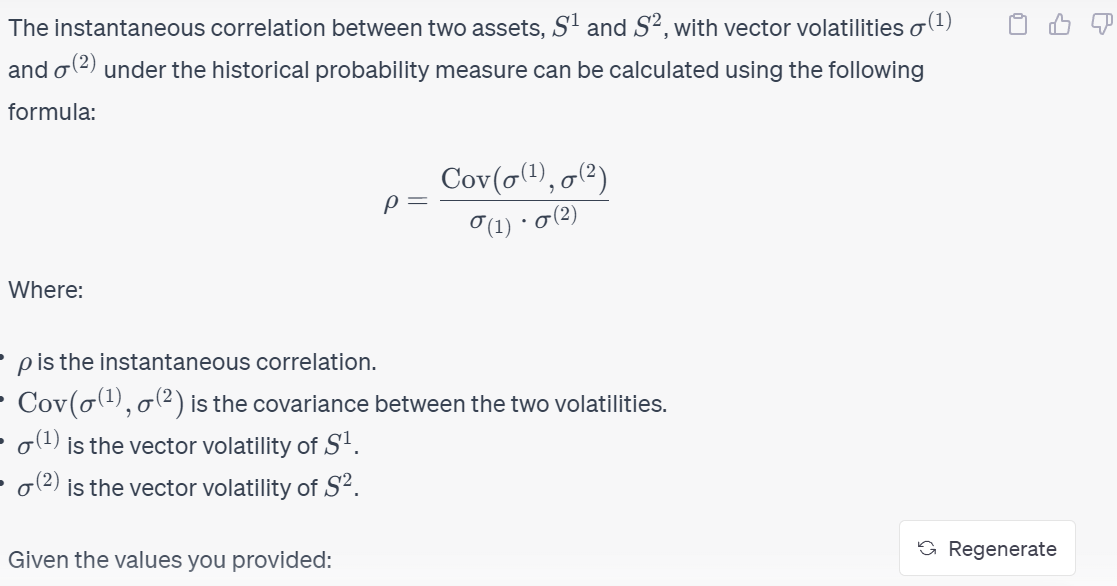

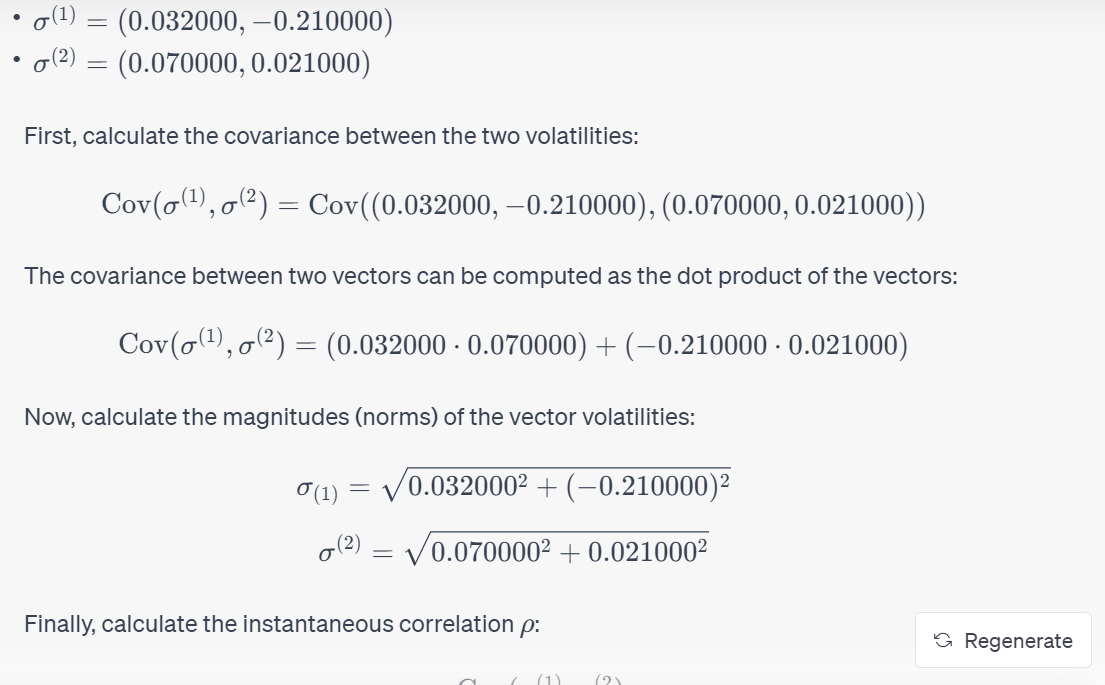

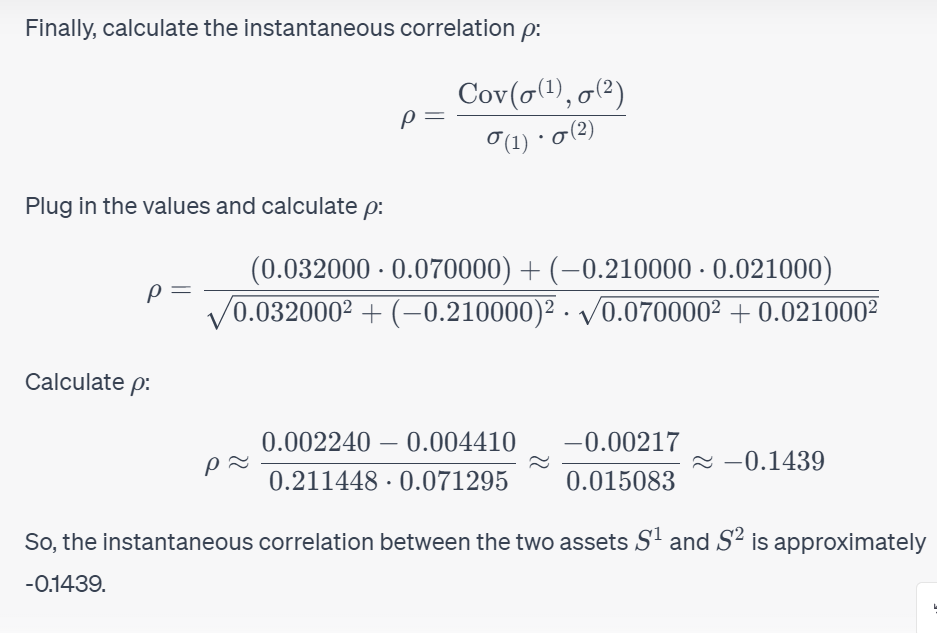

Let S be the price of an asset which does not pay dividend in a Black-Scholes model
. We would like to hedge a Call on S with parameters T_1,K_1 with a portfolio made of:
* \delta^S assets S
* \delta^C Call on S with parameters T_2,K_2
Compute \delta^C to have a delta-gamma hedged portfolio (expected accuracy = 0.001).
The parameters are
S_0=99.150000, T_1=0.652000, K_1=108.160000, T_2=0.844000, K_2=91.140000, r=0.092000, \sigma=0.120500

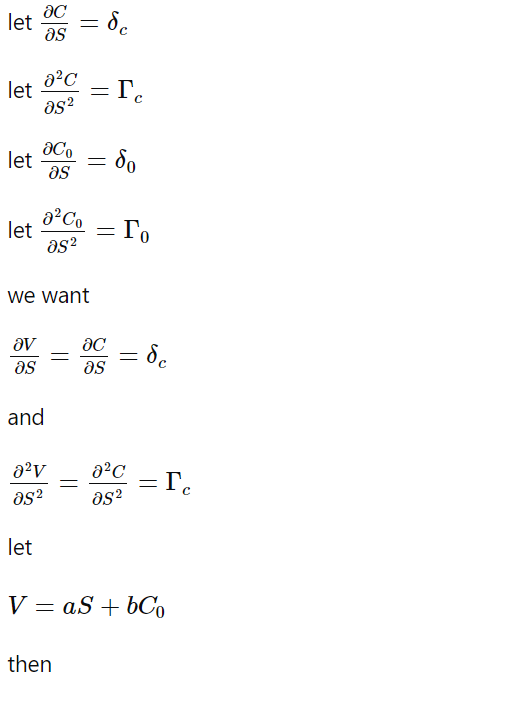

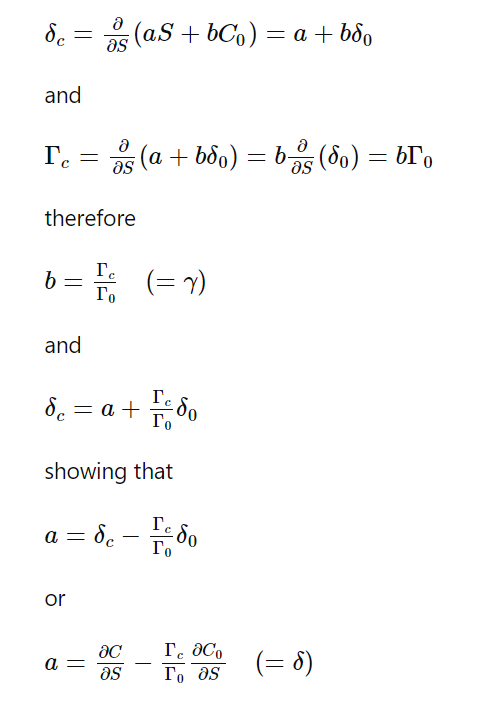

RETURN b = (Gamma(T1,K1,S0,r,sigma))/(Gamma(T2,K2,S0,r,sigma))

Find the coefficient b such that the process defined by X_t=e^{b\ t} \cos(aW_t) with the parameter a=8.430000 is a martingale (expected accuracy = 0.01).
Warning: cos= cosinus

In [ ]:
a = 8.43
b = (a**2)/2
b

35.53245

In [ ]:
0.0251859212/0.0216606089

1.1627522253079414

We consider a Call option, in the Black-Scholes model with the parameters S_0=100.520000, T=0.567000, K=104.280000, r=0.002000, q=0.073000, \sigma=0.279900. We would like to hedge the option with the Future on S with maturity T'=0.242000. How many Futures should we buy now at t=0? (expected accuracy = 0.001).

In [ ]:
S_0=100.520000
T1=0.567000
T2=0.242000
K=104.280000
r=0.002000
q=0.073000
sigma=0.279900

def Future_Call_Hedge(S, K, T1, T2, r, q, sigma):
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T1) / (sigma*np.sqrt(T1))
    d2 = d1 - sigma* np.sqrt(T1)
    return np.exp(-q*T1 + (q-r)*T2) * N(d1)

def Future_Put_Hedge(S, K, T1, T2, r, q, sigma):
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T1) / (sigma*np.sqrt(T1))
    d2 = d1 - sigma* np.sqrt(T1)
    return np.exp(-q*T1 + (q-r)*T2)*(N(d1)-1)

print('Call:',Future_Call_Hedge(S_0, K, T1, T2, r, q, sigma))
print('Put:',Future_Put_Hedge(S_0, K, T1, T2, r, q, sigma))

Call: 0.38797785357184034
Put: -0.5881038337938123


Compute the price at t=0 of a contract with payoff S_T(S_T-K)_+ at maturity T, in the Black-Scholes model, with the parameters S_0=9.520000, T=0.841000, K=10.750000, r=0, q=0, \sigma=0.288400 (expected accuracy = 0.01).

In [ ]:
N = norm.cdf
S0=9.520000
T=0.841000
K=10.750000
r=0
q=0
sigma=0.288400

#price of a call St*(St-K)

import numpy as np
import math
from scipy.stats import norm


print("Price of contract with payoff S_T(S_T - K)+ : ", S0*black_scholes_call_with_div(T=T, S=np.exp(sigma**2*T)*S0, K=K, sigma=sigma, r=r, q=q))


NameError: ignored